# Info
Name:  

    ATDM Proposal dust heating rate

Purpose:  

    Make some figures for the ATMD proposal
    Focus on the heating rate profiles obtained during ORACLES 2018 transit back, near Cabo Verde, with SSFR
  
Input:

    None
  
Output:

    Figures
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - 
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - for_Sam_20181025.out
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-08-23
    Modified: 

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st
import scipy.io as sio

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
fp =getpath('ORACLES')

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


# Load files

## Load the SSFR files

In [4]:
ssfr = sio.idl.readsav(fp+'data_other_2018/SSFR/for_Sam_20181025_SSFR.out')

In [5]:
ssfr.keys()

['utc', 'zenlambda', 'nadlambda', 'shsw', 'zenspectra', 'nadspectra']

Now interpolate the nadir spectra to the zenith wavelengths

In [19]:
def interp_spline(xold, yold, ynew):
    uv = UnivariateSpline(xold,yold,ext=0,k=1)
    return uv(ynew)

In [21]:
ssfr['nadspectra'].shape

(27351, 400)

In [25]:
ssfr['nadlambda'][0:10]

array([351.99384, 355.31583, 358.63852, 361.96188, 365.28592, 368.61063,
       371.936  , 375.26196, 378.58856, 381.9158 ], dtype=float32)

In [26]:
ssfr['nspectra'] = np.array([interp_spline(ssfr['nadlambda'],ssfr['nadspectra'][i,:],ssfr['zenlambda']) for i in xrange(len(ssfr['utc']))])

In [27]:
ssfr['nspectra'].shape

(27351, 400)

In [28]:
ssfr['f_net'] = ssfr['zenspectra'] - ssfr['nadspectra']

## Load the 4STAR file

In [6]:
s = lu.load_ict(fp+'aod_ict_2018/4STAR-AOD_P3_20181025_R1.ict')

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'flag_acaod', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')


In [7]:
sp = sio.loadmat(fp+'data_2018/4STAR_20181025starsun.mat')

## Load the merge file

In [13]:
mrg,mrg_head = lu.load_netcdf(fp+'data_other_2018/mrg1_P3_20181025_R13.nc',everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/mrg1_P3_20181025_R13.nc
Outputting the Data subdatasets:
0: time
1: time_bounds
2: Start_UTC
3: Day_Of_Year
4: Latitude
5: Longitude
6: GPS_Altitude
7: Pressure_Altitude
8: Radar_Altitude
9: Ground_Speed
10: True_Air_Speed
11: Indicated_Air_Speed
12: Mach_Number
13: Vertical_Speed
14: True_Heading
15: Track_Angle
16: Drift_Angle
17: Pitch_Angle
18: Roll_Angle
19: Static_Air_Temp
20: Potential_Temp
21: Dew_Point
22: Total_Air_Temp
23: IR_Surf_Temp
24: Static_Pressure
25: Cabin_Pressure
26: Wind_Speed
27: Wind_Direction
28: Solar_Zenith_Angle
29: Aircraft_Sun_Elevation
30: Sun_Azimuth
31: Aircraft_Sun_Azimuth
32: Mixing_Ratio
33: Part_Press_Water_Vapor
34: Sat_Vapor_Press_H2O
35: Sat_Vapor_Press_Ice
36: Relative_Humidity
37: WINDS_Pitch_deg
38: WINDS_Roll_deg
39: WINDS_Tstat_degC
40: WINDS_u_ms-1
41: WINDS_v_ms-1
42: WINDS_w_ms-1
43: WINDS_WSPD_ms-1
44: qual_flag
45: amass_aer
46: AOD_angstrom_470_865
47: AOD_polycoef_a

# Build up the plots to select the region
Do some of the calculations to the data here

Get the location of the dust profile

<IPython.core.display.Javascript object>


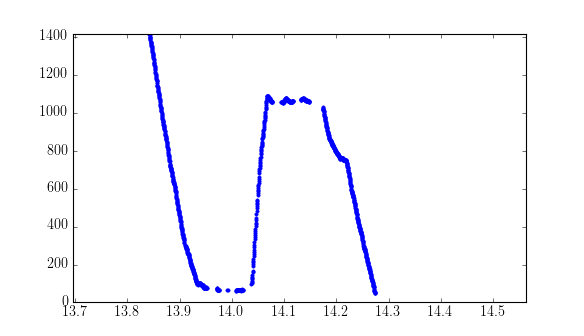

In [14]:
plt.figure()
plt.plot(s['Start_UTC'],s['GPS_Alt'],'.')

<IPython.core.display.Javascript object>


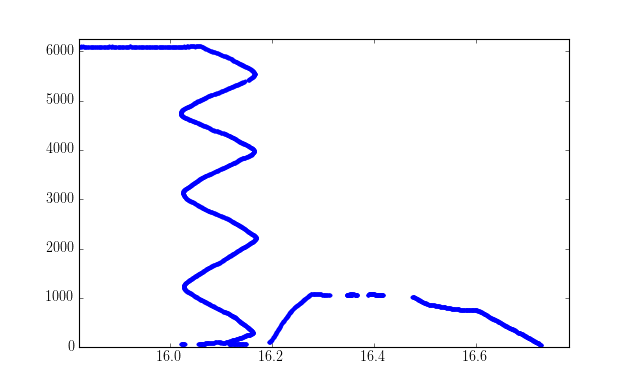

In [10]:
plt.figure()
plt.plot(s['Latitude'],s['GPS_Alt'],'.')

In [15]:
pfl = [13.565, 13.95]

In [17]:
i_ssfr = (ssfr['utc']>pfl[0]) & (ssfr['utc']<pfl[1])

In [30]:
ssfr['alt'] = interp_spline(s['Start_UTC'],s['GPS_Alt'],ssfr['utc'])

<IPython.core.display.Javascript object>


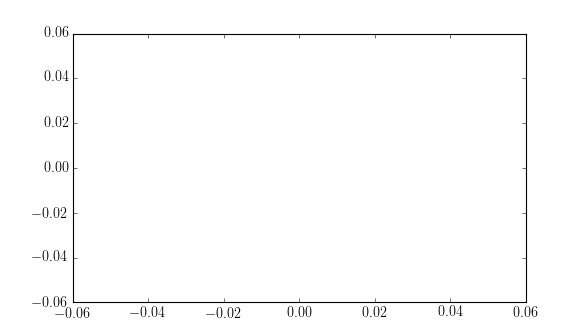

In [33]:
plt.figure()
plt.pcolor(ssfr['zenlambda'],ssfr['alt'][i_ssfr],ssfr['f_net'][i_ssfr,:])

In [36]:
ssfr['alt'][i_ssfr]

array([nan, nan, nan, ..., nan, nan, nan])

# Plotting
Present some fo the early plots here